## PART 4: Main Func: with Modifier.py
Error: the NaN values for X show up when Modifier can't generate (given the interval) new values.

[*MAIN*]: Main loop started with parameters:  {'domain_min_range': 1, 'domain_max_range': 100, 'modifier_incremental_unit': 3, 'modifier_data_point': 10}
[*MAIN*]: Main loop started with settings:  {'do_plot': False, 'extensive_search': True, 'extensive_iteration': False} 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [(1, 100)]
[MOD]: iteration:  0 , interval:  1 - 100

Simulator...
  * Sim_y shape:    (10,)


 Modx:  [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0] 
symx:  [-17.185304149361453, 5.977615314238157, -7.9463047404925335, 7.153412566464622, 5.822899392760917, 18.240506442022472, 25.213712401424637, 19.9742814784191, 28.008640872246602, 44.38658037883761]
       *** USING validator_controller
       *** USING local_exploration_validator_A
       *** USING fit_curve
       *** OUTPUT fit_curve slope, intercept [ 0.          0.678923

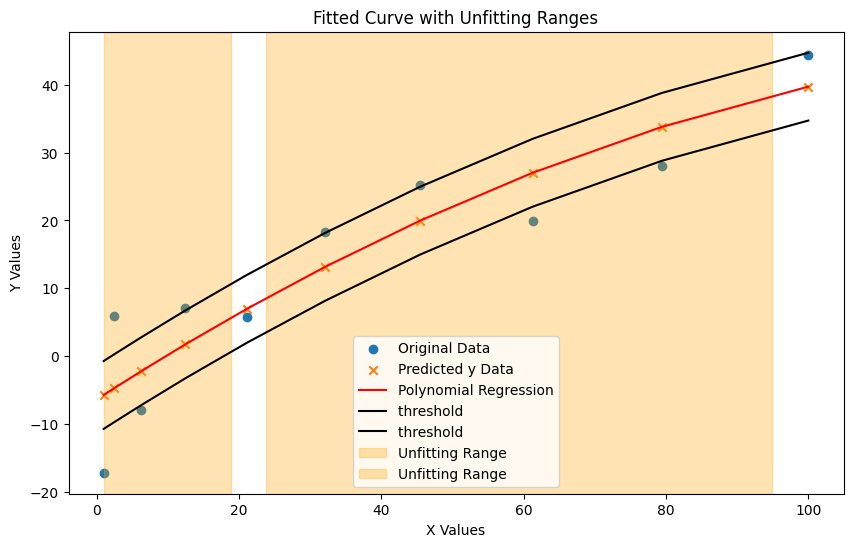

       *** OUTPUT unfitting_ranges [[1.0, 18.93478260869565], [23.83695652173913, 94.8586956521739]] 

       *** OUTPUT validator_ranges [[1.0, 18.93478260869565], [23.83695652173913, 94.8586956521739]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[1.0, 18.93478260869565], [23.83695652173913, 94.8586956521739]]
[MOD]: iteration:  0 , interval:  1.0 - 18.93478260869565
[MOD]: iteration:  1 , interval:  23.83695652173913 - 94.8586956521739

Simulator...
  * Sim_y shape:    (14,)


 Modx:  [1.0, 6.0441576086956506, 18.93478260869565, 23.83695652173913, 27.136784231198643, 31.281577763676815, 36.271337119173644, 42.106062297689135, 48.78575329922329, 56.310410123776094, 64.68003277134757, 73.8946212419377, 83.95417553554648, 94.8586956521739] 
symx:  [-6.77983841221261, -6.740756994691789, 13.02696118315309, 11.861340141801083, 15.17040257393413, 7.477486210112044, 24.133710456311398, 20.439763033316076, 18.7342552016515, 30.538799187182153, 34.79376173288464, 

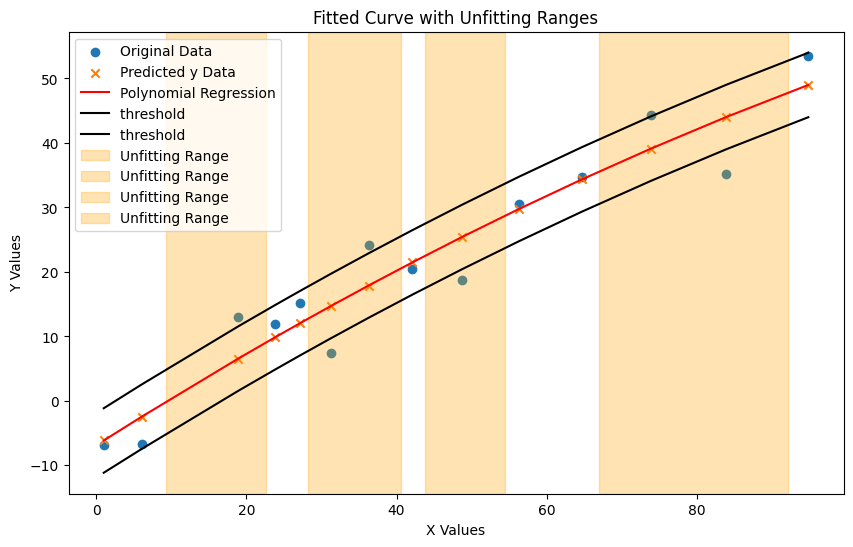

       *** OUTPUT unfitting_ranges [[9.26681385869565, 22.611413043478258], [28.172982614318187, 40.64738100306026], [43.77598504807267, 54.42924591763789], [66.9836798889951, 92.13256562301706]] 

       *** OUTPUT validator_ranges [[9.26681385869565, 22.611413043478258], [28.172982614318187, 40.64738100306026], [43.77598504807267, 54.42924591763789], [66.9836798889951, 92.13256562301706]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[9.26681385869565, 22.611413043478258], [28.172982614318187, 40.64738100306026], [43.77598504807267, 54.42924591763789], [66.9836798889951, 92.13256562301706]]
[MOD]: iteration:  0 , interval:  9.26681385869565 - 22.611413043478258
[MOD]: iteration:  1 , interval:  28.172982614318187 - 40.64738100306026
[MOD]: iteration:  2 , interval:  43.77598504807267 - 54.42924591763789
[MOD]: iteration:  3 , interval:  66.9836798889951 - 92.13256562301706

Simulator...
  * Sim_y shape:    (18,)


 Modx:  [9.26681385869565, 12.5495576458723

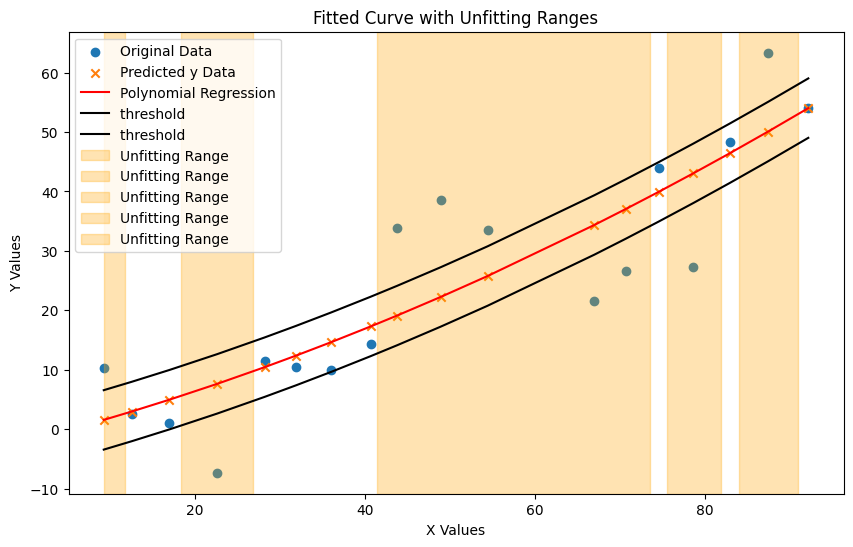

       *** OUTPUT unfitting_ranges [[9.26681385869565, 11.728871699078152], [18.401171291469453, 26.782590221608203], [41.42953201431337, 73.54929014522389], [75.53889525530812, 81.8261166888136], [84.0279925343997, 90.9520261744108]] 

       *** OUTPUT validator_ranges [[9.26681385869565, 11.728871699078152], [18.401171291469453, 26.782590221608203], [41.42953201431337, 73.54929014522389], [75.53889525530812, 81.8261166888136], [84.0279925343997, 90.9520261744108]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[9.26681385869565, 11.728871699078152], [18.401171291469453, 26.782590221608203], [41.42953201431337, 73.54929014522389], [75.53889525530812, 81.8261166888136], [84.0279925343997, 90.9520261744108]]
[MOD]: iteration:  0 , interval:  9.26681385869565 - 11.728871699078152
[MOD]: iteration:  1 , interval:  18.401171291469453 - 26.782590221608203
[MOD]: iteration:  2 , interval:  41.42953201431337 - 73.54929014522389
[MOD]: iteration:  3 , interval:  75.5

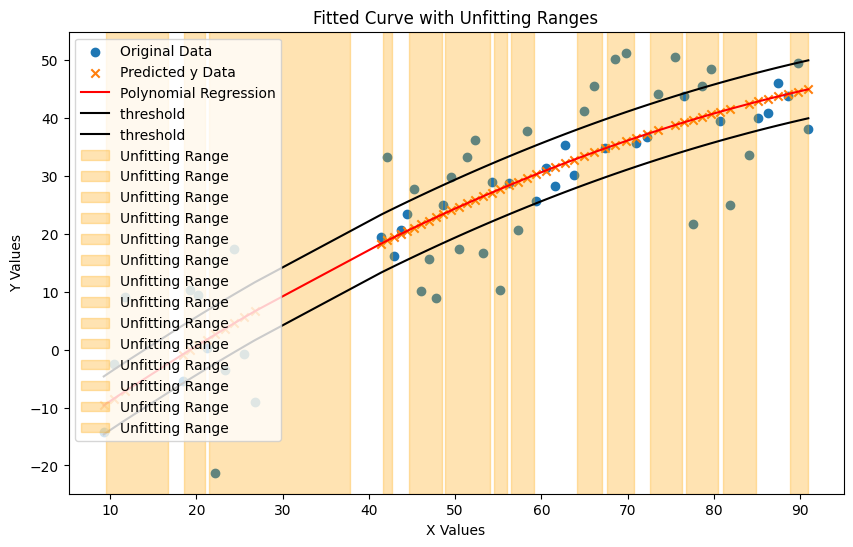

       *** OUTPUT unfitting_ranges [[9.55958312683612, 16.73309639337163], [18.62216787575917, 20.949055882305267], [21.449510132709158, 37.76779656613708], [41.61274111145664, 42.72510405172039], [44.6664313348539, 48.4360959499801], [48.876794836223155, 54.01286644778678], [54.5059987636462, 56.01161242603263], [56.52222255176416, 59.140814967442296], [64.1295568211488, 67.05401090958901], [67.65201008468115, 70.70754774716227], [72.59330377426728, 76.29978158187785], [76.8103746466068, 80.47792048281833], [81.01519765700696, 84.86863392860319], [88.88444826186497, 90.9520261744108]] 

       *** OUTPUT validator_ranges [[9.55958312683612, 16.73309639337163], [18.62216787575917, 20.949055882305267], [21.449510132709158, 37.76779656613708], [41.61274111145664, 42.72510405172039], [44.6664313348539, 48.4360959499801], [48.876794836223155, 54.01286644778678], [54.5059987636462, 56.01161242603263], [56.52222255176416, 59.140814967442296], [64.1295568211488, 67.05401090958901], [67.652010

In [1]:
# IMPORT LIBRARIES
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from itertools import compress

# import global parameters 
# TODO: make interface (widget) to load/change the parameters (low-priority)
from global_settings import mdv,vlv
from global_settings import mdv,simexSettings

#import classes for Modifier, Simulator, and Validator,
from Validator import Validator
from Modifier import Modifier
from Simulator import Simulator
from Logger import Logger

validator = Validator
modifier = Modifier
simulator = Simulator
logger = Logger()

mainfunc=True
# Initialize interval list
interval_lists=[(mdv["domain_min_range"], mdv["domain_max_range"])]
print('[*MAIN*]: Main loop started with parameters: ',mdv)
print('[*MAIN*]: Main loop started with settings: ',simexSettings,'\n')

while mainfunc:
    
    # Calls Modifier Controller
    mod_x_list= modifier.modifier_controller(ranges_list=interval_lists,local_modifier=modifier.local_modifier_A, do_plot=simexSettings["do_plot"])

    # breaks loop if iterations end by granularity reached
    if not mod_x_list: # FALSE IF ["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        print('[*MAIN*]: --   ITERATIONS END HERE  --')
        break
    
    # Calls Simulator
    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_B)
    assert len(mod_x) == len(sim_y_list)
    
    # print to see outputs from Mod and Sim controllers
    temp_log = "LEN OF MODX-SIMY: ",str(len(mod_x))," symx: ",str(len(sim_y_list))
    logger.log_main(temp_log)
    print('\n\n Modx: ',mod_x,'\nsymx: ',sim_y_list)
    
    # Calls Validator controller
    ranges = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    
    # Updates interval_list to new range output from validator controller
    interval_lists = ranges
logger.log_main("   ***   VAL overall stats    ***   ")


# TODO: make a list of history variable that are needed in validator: i-e- number of points total, number of good points, etc. 